In [77]:
import importlib

from mysklearn.mypytable import MyPyTable 
import mysklearn.myutils
importlib.reload(mysklearn.myutils)
from mysklearn import myutils
from mysklearn.myclassifiers import MySimpleLinearRegressionClassifier
from mysklearn.myclassifiers import MyKNeighborsClassifier
from mysklearn.myclassifiers import MyNaiveBayesClassifier
from mysklearn.myclassifiers import MyDecisionTreeClassifier
from mysklearn.myclassifiers import MyDummyClassifier

import mysklearn.myevaluation as myEval

from pathlib import Path
import matplotlib.pyplot as plt

alphabet_teams = ['Atlanta Hawks', 'Boston Celtics', 'Brooklyn Nets', 'Charlotte Hornets', 'Chicago Bulls',
        'Cleveland Cavaliers', 'Dallas Mavericks', 'Denver Nuggets', 'Detroit Pistons', 'Golden State Warriors', 'Houston Rockets', 'Indiana Pacers',
        'Los Angeles Clippers', 'Los Angeles Lakers', 'Memphis Grizzlies', 'Miami Heat', 'Milwaukee Bucks', 'Minnesota Timberwolves',
        'New Orleans Pelicans', 'New York Knicks', 'Oklahoma City Thunder', 'Orlando Magic', 'Philadelphia 76ers',
        'Phoenix Suns', 'Portland Trailblazers', 'Sacramento Kings', 'San Antonio Spurs', 'Toronto Raptors', 'Utah Jazz', 'Washington Wizards']

# can use this array for testing teams making the playoffs
playoffs_made_test = ['no', 'yes', 'no', 'no', 'no', 'yes', 'no', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes',
                      'yes', 'yes', 'yes', 'no', 'yes', 'yes', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no']

# Project Report
#### By: Joe Mock and James Cross

<p>In this project, we decided to look at data concerning the National Basketball Association (NBA). All data used in this project was provided by basketball-reference.com. <br>For some context, every team in the NBA plays 82 games in what is called the "Regular Season." Based on win/loss ratios in these games and a few other factors, teams will be ranked and play in "Playoff" games, where they will be put into a bracket and compete to win the championship.<br><br>We will primarily look at win/loss ratios to attempt to predict whether or not teams will make it to the playoffs through their first 10-20 games. All data that we will be using is from the 2024-25 NBA season to ensure current stats that can be used for training and testing on future NBA seasons.</p>

## Data Cleaning and Analysis

<p>Since every team is given a different dataset for their game logs, we need to do some manual cleaning and loading from a data folder that we have imported. This data folder contains 30 files (one for each NBA team), and below, they will be compiled into one file that computes their total stats through their first N games. Here we are choosing their first N games to be 20.</p>

In [78]:
# We will first load our datasets from .txt files pulled from basketball-reference.com
# This is the entire season data that we can utilize later for classification
season_data = MyPyTable().load_from_file("data/team-stats-24-25.txt")

# The following is to build the data for the first N games of the season
cols_to_drop = ["Rk", "Gtm", "Date", "OT", "FG", "FGA", "FG%", "STL", "BLK", "3P%", "2P%", "eFG%", "FT%", "", "Opp", "ORB", "DRB"]
folder = Path("data/otherFirst/")
files = sorted(folder.glob("*.txt"))  # alphabetical order

team_tables = [MyPyTable().load_from_file(str(f)) for f in files]

for i, team in enumerate(team_tables):
    team.drop_column(cols_to_drop)
    myutils.get_first_n_games(team, 35)
    team.convert_to_numeric()
   # print(team.column_names)
    team.get_totals(alphabet_teams[i])
    if i == 0:
        team.save_to_file("data/output/trial1.txt")
    else:
        team.save_DATA_to_file("data/output/trial1.txt")

## Data Visualization

Text(0, 0.5, 'Number of teams')

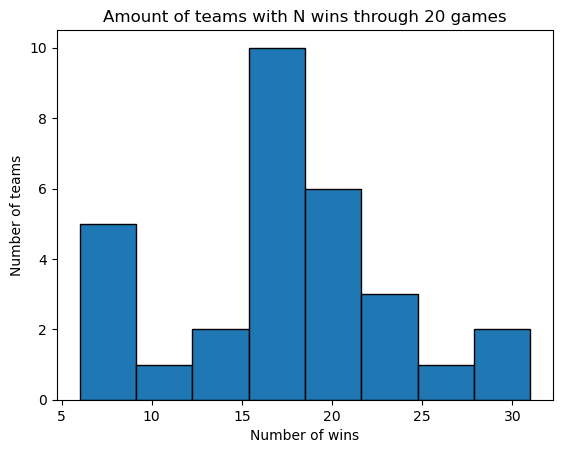

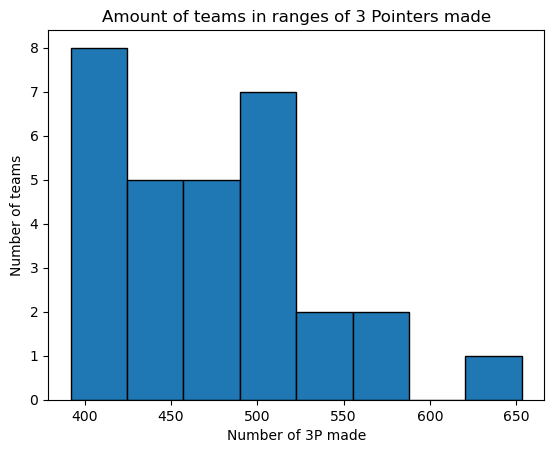

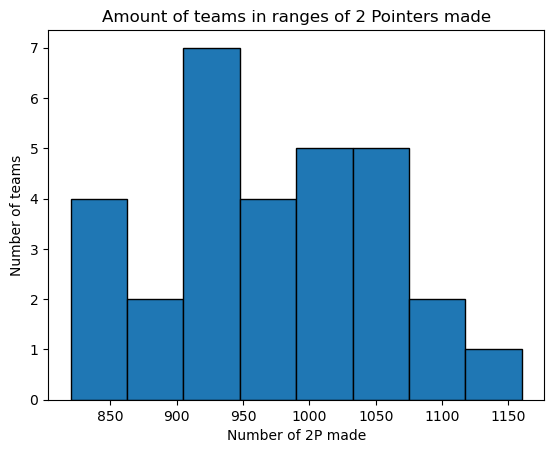

In [79]:
# TODO : Plug in code for visualizing data - Histograms

# Things to consider: Win/Loss, Points, FG%

first_games_data = MyPyTable().load_from_file("data/output/trial1.txt")
plt.figure()
xs = first_games_data.get_column("Wins")
plt.hist(xs, bins=8, edgecolor='black')
plt.title("Amount of teams with N wins through 20 games")
plt.xlabel("Number of wins")
plt.ylabel("Number of teams")

plt.figure()
xs = first_games_data.get_column("3P")
plt.hist(xs, bins=8, edgecolor='black')
plt.title("Amount of teams in ranges of 3 Pointers made")
plt.xlabel("Number of 3P made")
plt.ylabel("Number of teams")

plt.figure()
xs = first_games_data.get_column("2P")
plt.hist(xs, bins=8, edgecolor='black')
plt.title("Amount of teams in ranges of 2 Pointers made")
plt.xlabel("Number of 2P made")
plt.ylabel("Number of teams")
# Not sure what else to add for a histogram as most data is coninuous

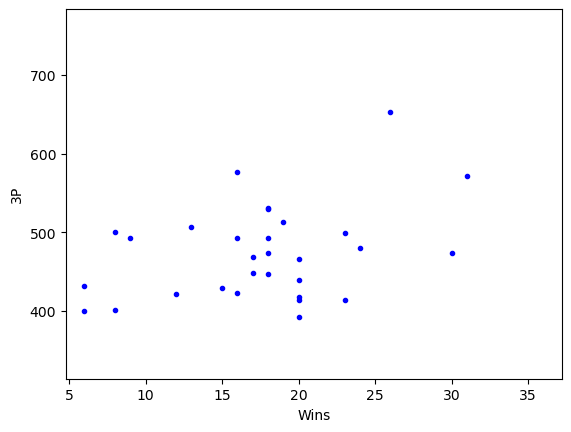

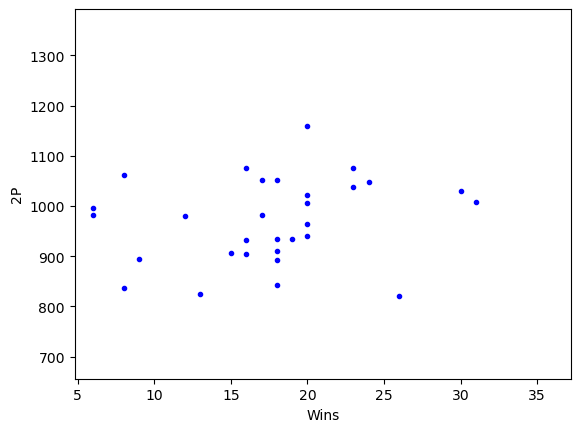

In [80]:
# TODO : Plug in code for visualizing data - Scatterplots
myutils.get_scatter("Wins", "3P", first_games_data)
myutils.get_scatter("Wins", "2P", first_games_data)


With these scatterplots and box plots, we can make some assertations about the data and talk about it a little bit. Like what does it mean and what it can help to exemplify within out project.

## Classifier Training

<p>Now that we have all data loaded and cleaned, we can continue by building, training, and evaluating the classifiers that we have built throughout this semester </p>

### Linear Regression

In [81]:
# TODO : Training, testing, evaluating performance for linear regression
# Goal is to classify whether a team will make the playoffs
# Which factor is best for classifying this for linear regression?

# We can use linear regression to see how well our classifiers will work
# We can predict the amount of games teams will win based off how many they have won in first N games
X = myutils.get_instances(first_games_data, ["Wins"])
y = season_data.get_column("W")
X_train, X_test, y_train, y_test = myEval.train_test_split(X, y) 

linearClass = MySimpleLinearRegressionClassifier(discretizer=None)
linearClass.fit(X_train, y_train)

pred = linearClass.predict(X_test)

# Convert to integers since teams cannot have "partial" wins
pred = [int(x) for x in pred[0]]
actual = [int(x) for x in y_test]
avg_diff = myutils.get_prediction_difference(actual, pred)
print(pred)
print(actual)
pred = myutils.assert_made_playoffs(pred)
actual = myutils.assert_made_playoffs(actual)
print(actual)
print(pred)

print(avg_diff)

[42, 40, 44, 30, 32, 57, 36, 19, 23, 23]
[34, 44, 48, 36, 26, 61, 24, 18, 30, 19]
['no', 'no', 'yes', 'no', 'no', 'yes', 'no', 'no', 'no', 'no']
['no', 'no', 'no', 'no', 'no', 'yes', 'no', 'no', 'no', 'no']
5.6


With linear regression classification, we can easily predict how many games each team will win throughout the rest of the season. The larger issue with this type of classification in our dataset is that we are using the general rule that a team must win 45 or more games to make the playoffs. This can fluctuate and be different depending on the season. This can also be skewed for teams on the fringe, because the classifier was only off by a few games on average, but if teams are close to making the playoffs (or close to missing them), this small difference can display largely different results based on the playoff rule that we are using.

### kNN Classification

In [85]:
# TODO : Training, testing, evaluating performance for kNN
mykNNClass = MyKNeighborsClassifier()
X = myutils.get_instances(first_games_data, ["Wins"])
y = playoffs_made_test.copy()
X_train, X_test, y_train, y_test = myEval.train_test_split(X, y) 

mykNNClass.fit(X_train, y_train)
pred = mykNNClass.predict(X_test)
accuracy = myEval.accuracy_score(y_test, pred)
myutils.output_classified_results(X_test, y_test, pred)
print("Accuracy:", accuracy)


X = myutils.get_instances(first_games_data, ["Wins", "2P", "3P", "2PA", "3PA"])
y = playoffs_made_test.copy()
X_train, X_test, y_train, y_test = myEval.train_test_split(X, y) 

mykNNClass.fit(X_train, y_train)
pred = mykNNClass.predict(X_test)
accuracy = myEval.accuracy_score(y_test, pred)
myutils.output_classified_results(X_test, y_test, pred)
print("Accuracy:", accuracy)

instance: [23.0] Class: yes Actual: yes
instance: [8.0] Class: no Actual: no
instance: [16.0] Class: no Actual: no
instance: [20.0] Class: yes Actual: no
instance: [23.0] Class: yes Actual: yes
instance: [16.0] Class: no Actual: no
instance: [17.0] Class: yes Actual: yes
instance: [13.0] Class: no Actual: no
instance: [26.0] Class: yes Actual: yes
instance: [18.0] Class: yes Actual: no
Accuracy: 0.8
instance: [19.0, 513.0, 1319.0, 934.0, 1709.0] Class: no Actual: yes
instance: [6.0, 400.0, 1187.0, 995.0, 1961.0] Class: no Actual: no
instance: [18.0, 531.0, 1438.0, 911.0, 1768.0] Class: yes Actual: yes
instance: [20.0, 414.0, 1092.0, 1160.0, 2075.0] Class: no Actual: yes
instance: [16.0, 492.0, 1313.0, 905.0, 1674.0] Class: no Actual: no
instance: [20.0, 392.0, 1282.0, 941.0, 1696.0] Class: no Actual: no
instance: [13.0, 507.0, 1377.0, 824.0, 1574.0] Class: no Actual: no
instance: [20.0, 418.0, 1178.0, 1006.0, 1832.0] Class: no Actual: yes
instance: [18.0, 474.0, 1386.0, 935.0, 1710.0] 

From this kNN classification, we can see how the classifier changes it's predictions based on different values that we can use for training. After running this multiple times, we can see that the classifier is actually more accurate when it does not take into account other factors (like 2-pointers and 3-pointers made or 2-pointers and 3-pointers made against the given team).

### Naive Bayes Classification

In [7]:
# TODO : Training, testing, evaluating performance for Naive Bayes
myNaive = MyNaivebayesClassifier()


### TDIDT Classification

In [8]:
# TODO : Training, testing, evaluating performace for TDIDT

### Classification Summary

In [9]:
# TODO : Run a dummy classifier and compare results of all other classifiers

## Summary

What did we discover in this project?
What was difficult?
Where could we have improved?
Is this a viable thing to use for real-life scenarios?
Where could this be used in real-life scenarios?
